# Sentiment Analysis of IMDB reviews

## Importing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IMDB Dataset.csv')
df.head()
df = df.sample(10000)


In [ ]:
# Review Frquency Count
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count']
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'})
vc_df

,Sentiment,Count
0,NaN,5034
1,NaN,4966


In [ ]:
df.head()

,review,sentiment
49807,When you look at Mexico's best movies you will...,positive
34662,This film fails on every count. For a start it...,negative
25816,"A study of one of those universally familiar, ...",positive
15274,What a shame it is when a potentially captivat...,negative
40714,Little Quentin seems to have mastered the art ...,negative


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



#### Removing punctuation (.!<>{}’,”(/)-\)

In [ ]:
df['review']

49807    When you look at Mexico's best movies you will...
34662    This film fails on every count. For a start it...
25816    A study of one of those universally familiar, ...
15274    What a shame it is when a potentially captivat...
40714    Little Quentin seems to have mastered the art ...
                               ...                        
34587    Taking over roles that Jack Albertson and Sam ...
7713     Joe Don Baker is an alright to good actor in s...
3770     I love this movie, first and foremost because ...
37711    I would rather of had my eyes gouged out with ...
16586    This 1988 movie was shown recently on a cable ...
Name: review, Length: 10000, dtype: object

In [ ]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['review','review_processed','sentiment']]

<ipython-input-7-65661fb9c457>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]", " ")


In [ ]:
df['review_processed']

49807    When you look at Mexico s best movies you will...
34662    This film fails on every count  For a start it...
25816    A study of one of those universally familiar  ...
15274    What a shame it is when a potentially captivat...
40714    Little Quentin seems to have mastered the art ...
                               ...                        
34587    Taking over roles that Jack Albertson and Sam ...
7713     Joe Don Baker is an alright to good actor in s...
3770     I love this movie  first and foremost because ...
37711    I would rather of had my eyes gouged out with ...
16586    This 1988 movie was shown recently on a cable ...
Name: review_processed, Length: 10000, dtype: object

*italicized text*#### Lowercase characer

In [ ]:
"prathiba" == "Prathiba"

False

In [ ]:
word = "Prathiba"
word.lower()

'prathiba'

In [ ]:
# make entire text lowercase
df['review_processed'] = [row.lower() for row in df['review_processed']]

In [ ]:
df['review_processed']

49807    when you look at mexico s best movies you will...
34662    this film fails on every count  for a start it...
25816    a study of one of those universally familiar  ...
15274    what a shame it is when a potentially captivat...
40714    little quentin seems to have mastered the art ...
                               ...                        
34587    taking over roles that jack albertson and sam ...
7713     joe don baker is an alright to good actor in s...
3770     i love this movie  first and foremost because ...
37711    i would rather of had my eyes gouged out with ...
16586    this 1988 movie was shown recently on a cable ...
Name: review_processed, Length: 10000, dtype: object

#### Remove stop words

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
add_words = ['movie','br','go','film','ugh','one','make','even','see','movies','get','makes','making','time','watch','character', 'like', 'good','well','would','really', 'show', 'look']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['review_processed']

49807    look mexico best likely find photography perfo...
34662    fails every count start pretentious striving s...
25816    study universally familiar physical emotional ...
15274    shame potentially captivating refreshingly low...
40714    little quentin seems mastered art cake eating ...
                               ...                        
34587    taking roles jack albertson sam levene played ...
7713     joe baker alright actor small roles alright go...
3770     love first foremost mark wahlberg secondly end...
37711    rather eyes gouged rusty ice picks sit abortio...
16586    1988 shown recently cable channel wanted anoth...
Name: review_processed, Length: 10000, dtype: object

#### Lemmatization

In [ ]:
# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk_tagged = nltk.pos_tag(nltk.word_tokenize("This batch is awesome"))
nltk_tagged

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'), ('batch', 'NN'), ('is', 'VBZ'), ('awesome', 'JJ')]

1) split sentence into words
2) get the detailed POS for each word
3) get shallow POS from detailed POS
4) do lemmatisation for each word
5) join all the words to form sentence

In [ ]:
df['review_processed']

49807    look mexico best likely find photography perfo...
34662    fails every count start pretentious strive sig...
25816    study universally familiar physical emotional ...
15274    shame potentially captivate refreshingly low k...
40714    little quentin seem mastered art cake eat usua...
                               ...                        
34587    take role jack albertson sam levene played bro...
7713     joe baker alright actor small role alright gol...
3770     love first foremost mark wahlberg secondly end...
37711    rather eye gouge rusty ice pick sit abortion p...
16586    1988 show recently cable channel want another ...
Name: review_processed, Length: 10000, dtype: object

#### Plotting Freqent Words

In [ ]:
df

,review,review_processed,sentiment
54,The 33 percent of the nations nitwits that sti...,33 percent nation nitwit still support w bush ...,negative
15369,I definitely recommend reading the book prior ...,definitely recommend read book prior watch boo...,positive
49153,Francis Ford Coppola's masterpiece was a great...,francis ford coppola masterpiece great end gol...,positive
9885,This is one of my all time favorites.<br /><br...,favorite flaw come rag bull much engage viewer...,positive
45587,My friend and I rented this movie for 3.99 at ...,friend rent 3 99 blockbuster know absolutely h...,negative
...,...,...,...
23401,"I just saw this episode this evening, on a rec...",saw episode even recently add presentation loc...,positive
35591,"Based on Stephen Hawking's ""A Brief History of...",base stephen hawk brief history amaze eroll mo...,positive
10418,I went to go see this at the Esquire Theatre i...,go esquire theatre cincy oh hate life christop...,negative
20270,It's one of my favorite movies as much because...,favorite much location music story line matter...,positive


#### WordCloud

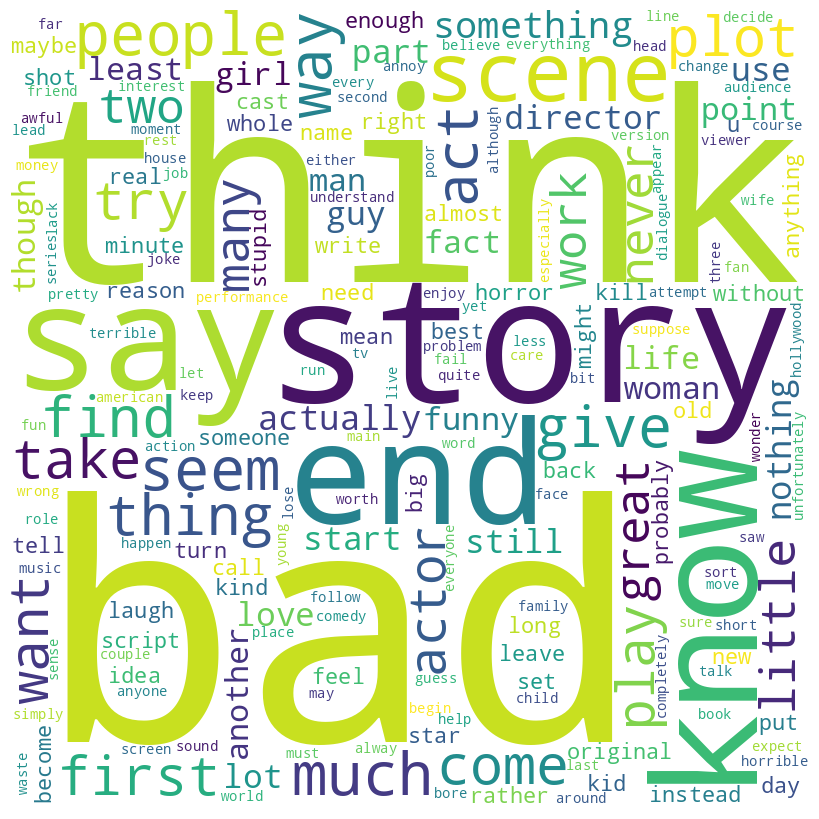

In [ ]:
##
## Bilding a Word Cloud
##
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head()

X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names_out()


X, y


# # # Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=777)


In [ ]:
X_train.shape, X_test.shape

((8000, 2500), (2000, 2500))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Building the ML model

## Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred
#featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])



array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[713 291]
 [333 663]]
The model accuracy is 0.688


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, dt.predict(X_test))

0.6799999999999999

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
43,0.128379,bad
507,0.046719,waste
209,0.026451,great
41,0.023585,awful
456,0.019295,stupid
...,...,...
12,0.000375,warn
8,0.000333,watched
505,0.000250,want
255,0.000249,kelly


In [ ]:
user_sentence = "Bad movie, one of the worst screenplay. I slept the whole movie. Can somebody ask the actor to stop acting?"
#user_sentence = "One of the not good movies I have ever watched - what was even that ?"

user_sentence = user_sentence.replace(".", " ")
user_sentence = user_sentence.lower()

user_sentence = remove_stopwords(user_sentence)
user_sentence = lemmatize_sentence(user_sentence)

user_sentence

X_test = tfidf.transform([user_sentence]).toarray()
X_test

dt.predict(X_test)


array([0])

In [ ]:
2 + 3

5